In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

##### Load files from monthly averages

In [3]:
#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]









In [56]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


<ipython-input-56-f3891ca148fd>:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)


In [57]:
monthly_array_diatoms_depthint_slicemean

array([[           nan,            nan, 2.69582814e-07, 4.93918408e-05,
        7.20690301e-05, 3.77249277e-05, 2.60008713e-05, 7.38892261e-06,
        3.11866975e-06,            nan, 1.78357901e-11,            nan],
       [           nan,            nan, 2.52657921e-06, 7.19261748e-05,
        5.77454967e-05, 4.80306846e-05, 6.69064866e-05, 2.04430967e-05,
        1.21092862e-05, 7.46960535e-07, 7.49724079e-11,            nan],
       [           nan,            nan, 1.94314723e-06, 6.44265452e-05,
        5.56050347e-05, 4.60571202e-05, 5.23939511e-05, 2.77115764e-05,
        2.49297131e-06, 8.59211295e-07, 2.10355282e-10,            nan],
       [           nan,            nan, 3.99208646e-06, 4.57661463e-05,
        6.38776491e-05, 2.75731780e-05, 4.79074894e-05, 3.94136482e-05,
        1.04189305e-05, 7.62243797e-07, 7.52117665e-09,            nan],
       [           nan,            nan, 4.71477067e-08, 6.40016611e-06,
        4.29308347e-05, 4.31145099e-05, 1.76798423e-05, 4.50

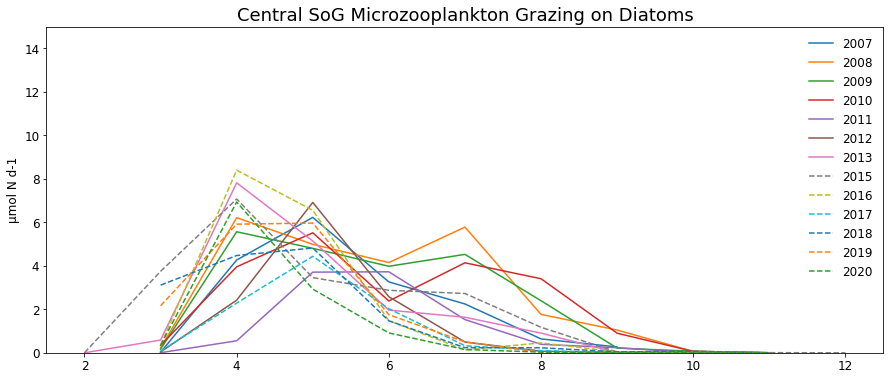

In [6]:



#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[i,:]*86400,label=2007+i)
    ax.set_title('Central SoG Microzooplankton Grazing on Diatoms',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,125)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(8,14):
    ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[i,:]*86400,linestyle='--',label=2007+i)
    ax.set_title('Central SoG Microzooplankton Grazing on Diatoms',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,15)
    ax.set_ylabel('\u03bcmol N d-1')

In [7]:
NPGOdiatomspositive=(((monthly_array_diatoms_depthint_slicemean[0,:]+monthly_array_diatoms_depthint_slicemean[1,:]+\
        monthly_array_diatoms_depthint_slicemean[2,:]+monthly_array_diatoms_depthint_slicemean[3,:]+\
        monthly_array_diatoms_depthint_slicemean[4,:]+monthly_array_diatoms_depthint_slicemean[5,:]+\
        monthly_array_diatoms_depthint_slicemean[6,:])/7)*86400)

In [8]:
monthly_array_diatoms_depthint_slicemean[5,:]*86400

array([       nan,        nan, 0.03975277, 2.42124196, 6.91627295,
       2.57712089, 0.4957714 , 0.06936772, 0.02121565, 0.02154395,
              nan,        nan])

In [9]:
NPGOdiatomspositive

array([       nan,        nan, 0.19774265, 4.3991638 , 5.32938372,
       3.14813452, 2.90733624, 1.36696537, 0.38475684,        nan,
              nan,        nan])

In [10]:
NPGOdiatomsnegative=(((monthly_array_diatoms_depthint_slicemean[7,:]+monthly_array_diatoms_depthint_slicemean[8,:]+\
        monthly_array_diatoms_depthint_slicemean[9,:]+monthly_array_diatoms_depthint_slicemean[10,:]+\
        monthly_array_diatoms_depthint_slicemean[11,:]+monthly_array_diatoms_depthint_slicemean[12,:]+\
        monthly_array_diatoms_depthint_slicemean[13,:])/7)*86400)

In [11]:
NPGOdiatomsnegative

array([       nan,        nan, 1.53108544, 5.95909044, 4.39846531,
       1.63603838, 0.59731794, 0.29351698, 0.01870415, 0.01631591,
              nan,        nan])

In [12]:
NPGOdiatomspositive.mean()

nan

In [13]:
NPGOdiatomsnegative.mean()

nan

Text(0, 0.5, '$\\mu$M N d$^{-1}$')

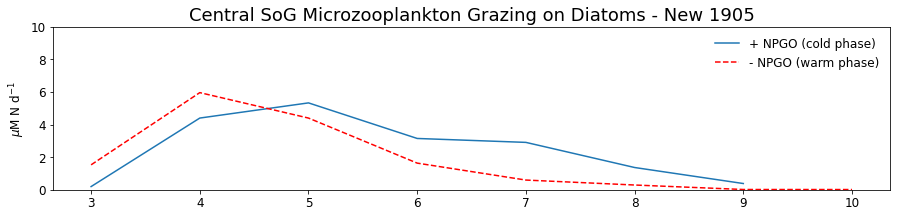

In [14]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOdiatomspositive,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOdiatomsnegative,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG Microzooplankton Grazing on Diatoms - New 1905',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,10)
ax.set_ylabel('$\mu$M N d$^{-1}$')
   

In [15]:
RandomDiat1=(((monthly_array_diatoms_depthint_slicemean[0,:]+monthly_array_diatoms_depthint_slicemean[2,:]+\
        monthly_array_diatoms_depthint_slicemean[4,:]+monthly_array_diatoms_depthint_slicemean[6,:]+\
        monthly_array_diatoms_depthint_slicemean[8,:]+monthly_array_diatoms_depthint_slicemean[10,:]+\
        monthly_array_diatoms_depthint_slicemean[12,:])/7)*86400)

In [16]:
RandomDiat2=(((monthly_array_diatoms_depthint_slicemean[1,:]+monthly_array_diatoms_depthint_slicemean[3,:]+\
        monthly_array_diatoms_depthint_slicemean[5,:]+monthly_array_diatoms_depthint_slicemean[7,:]+\
        monthly_array_diatoms_depthint_slicemean[9,:]+monthly_array_diatoms_depthint_slicemean[11,:]+\
        monthly_array_diatoms_depthint_slicemean[13,:])/7)*86400)

Text(0, 0.5, '$\\mu$M N d$^{-1}$')

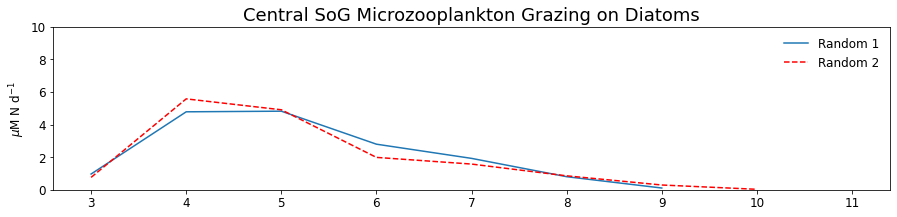

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), RandomDiat1,label='Random 1')
ax.plot(np.arange(1,13), RandomDiat2,linestyle='--',label='Random 2',color='r')
ax.set_title('Central SoG Microzooplankton Grazing on Diatoms',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,10)
ax.set_ylabel('$\mu$M N d$^{-1}$')
   

In [18]:

#years, months, data
monthly_array_flag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]







In [19]:
monthly_array_flag_depthint_slice[monthly_array_flag_depthint_slice == 0 ] = np.nan
monthly_array_flag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_flag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_flag_depthint_slicemean))

(14, 12)


In [20]:
monthly_array_flag_depthint_slicemean

array([[1.20448220e-06, 4.88831689e-06, 7.50140346e-06, 1.28176959e-05,
        6.86412153e-06, 3.69447664e-05, 5.99495429e-05, 7.04457453e-05,
        3.77259787e-05, 4.54633183e-06, 1.34929230e-06, 6.83829892e-07],
       [9.95990636e-07, 5.26238577e-06, 1.15415009e-05, 1.36468588e-05,
        7.35711646e-06, 3.84709260e-05, 4.32282580e-05, 2.93758736e-05,
        1.95358283e-05, 5.79262396e-06, 1.08699364e-06, 9.61311685e-07],
       [1.47323868e-06, 6.02268454e-06, 9.39882073e-06, 8.09065773e-06,
        1.23928291e-05, 3.93599926e-05, 6.58215373e-05, 3.74874773e-05,
        3.32908510e-05, 4.50153298e-06, 7.66230673e-07, 1.17956810e-06],
       [1.10772148e-06, 4.31615667e-06, 1.02719700e-05, 9.28878995e-06,
        5.94193343e-06, 5.75481498e-05, 6.40646345e-05, 3.09080965e-05,
        1.83696748e-05, 3.89516687e-06, 1.17135148e-06, 5.75026328e-07],
       [9.28127022e-07, 3.90473675e-06, 7.86633139e-06, 6.10598009e-06,
        1.48714865e-05, 5.34231407e-05, 5.45716348e-05, 6.61

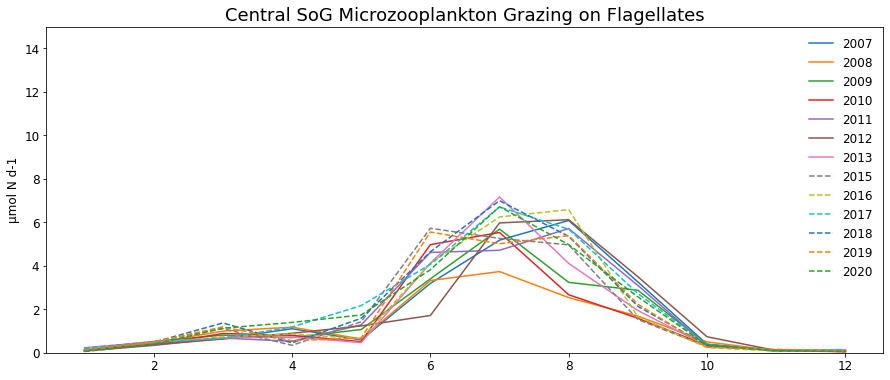

In [21]:



#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), monthly_array_flag_depthint_slicemean[i,:]*86400,label=2007+i)
    ax.set_title('Central SoG Microzooplankton Grazing on Flagellates',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,125)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(8,14):
    ax.plot(np.arange(1,13), monthly_array_flag_depthint_slicemean[i,:]*86400,linestyle='--',label=2007+i)
    ax.set_title('Central SoG Microzooplankton Grazing on Flagellates',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,15)
    ax.set_ylabel('\u03bcmol N d-1')

In [22]:
NPGOflagpositive=(((monthly_array_flag_depthint_slicemean[0,:]+monthly_array_flag_depthint_slicemean[1,:]+\
        monthly_array_flag_depthint_slicemean[2,:]+monthly_array_flag_depthint_slicemean[3,:]+\
        monthly_array_flag_depthint_slicemean[4,:]+monthly_array_flag_depthint_slicemean[5,:]+\
        monthly_array_flag_depthint_slicemean[6,:])/7)*86400)

In [23]:
monthly_array_flag_depthint_slicemean[5,:]*86400

array([0.10776114, 0.37307866, 0.63443693, 0.89833608, 1.23613801,
       1.71687909, 5.97318812, 6.1208901 , 3.50017398, 0.73760344,
       0.10207208, 0.07211006])

In [24]:
NPGOflagpositive

array([0.11946506, 0.4266672 , 0.7631723 , 0.84819281, 0.82892195,
       3.62009274, 5.42742745, 4.35392374, 2.56471083, 0.42762345,
       0.10297674, 0.08993236])

In [25]:
NPGOflagnegative=(((monthly_array_flag_depthint_slicemean[7,:]+monthly_array_flag_depthint_slicemean[8,:]+\
        monthly_array_flag_depthint_slicemean[9,:]+monthly_array_flag_depthint_slicemean[10,:]+\
        monthly_array_flag_depthint_slicemean[11,:]+monthly_array_flag_depthint_slicemean[12,:]+\
        monthly_array_flag_depthint_slicemean[13,:])/7)*86400)

In [26]:
NPGOflagnegative

array([0.15375196, 0.48218906, 0.98658006, 0.76767403, 1.45837599,
       4.83465248, 6.22657759, 5.58607018, 2.29991012, 0.31963607,
       0.1226987 , 0.08964083])

In [27]:
NPGOflagpositive.mean()

1.631092219103321

In [28]:
NPGOflagnegative.mean()

1.9439797564714418

Text(0, 0.5, '$\\mu$M N d$^{-1}$')

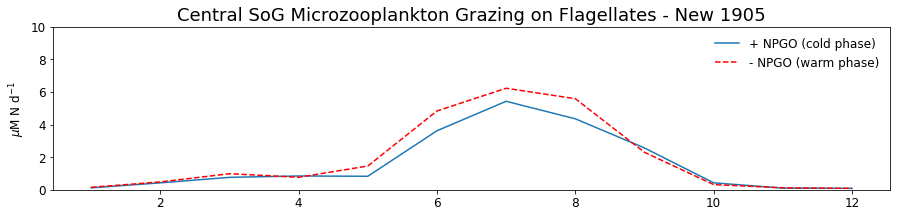

In [29]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOflagpositive,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOflagnegative,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG Microzooplankton Grazing on Flagellates - New 1905',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,10)
ax.set_ylabel('$\mu$M N d$^{-1}$')
   

In [30]:
RandomFlag1=(((monthly_array_flag_depthint_slicemean[0,:]+monthly_array_flag_depthint_slicemean[2,:]+\
        monthly_array_flag_depthint_slicemean[4,:]+monthly_array_flag_depthint_slicemean[6,:]+\
        monthly_array_flag_depthint_slicemean[8,:]+monthly_array_flag_depthint_slicemean[10,:]+\
        monthly_array_flag_depthint_slicemean[12,:])/7)*86400)

In [31]:
RandomFlag2=(((monthly_array_flag_depthint_slicemean[1,:]+monthly_array_flag_depthint_slicemean[3,:]+\
        monthly_array_flag_depthint_slicemean[5,:]+monthly_array_flag_depthint_slicemean[7,:]+\
        monthly_array_flag_depthint_slicemean[9,:]+monthly_array_flag_depthint_slicemean[11,:]+\
        monthly_array_flag_depthint_slicemean[13,:])/7)*86400)

Text(0, 0.5, '$\\mu$M N d$^{-1}$')

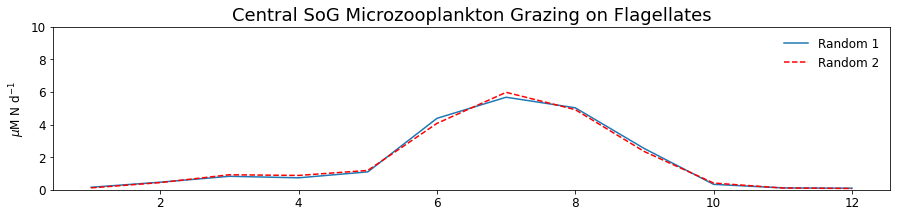

In [32]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13),RandomFlag1,label='Random 1')
ax.plot(np.arange(1,13), RandomFlag2,linestyle='--',label='Random 2',color='r')
ax.set_title('Central SoG Microzooplankton Grazing on Flagellates',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,10)
ax.set_ylabel('$\mu$M N d$^{-1}$')

In [33]:
df = pd.read_csv('https://www.cpc.ncep.noaa.gov/data/indices/soi', skiprows=87, index_col=0, delim_whitespace=True)
df = df[:-10]

In [34]:
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1951,1.5,0.9,-0.1,-0.3,-0.7,0.2,-1.0,-0.2,-1.1,-1.0,-0.8,-0.7
1952,-0.9,-0.6,0.5,-0.2,0.8,0.7,0.5,0.1,-0.2,0.4,0.0,-1.2
1953,0.3,-0.5,-0.2,0.2,-1.7,0.1,-0.0,-1.2,-1.2,0.1,-0.3,-0.5
1954,0.7,-0.3,0.3,0.6,0.5,0.1,0.4,1.1,0.2,0.3,0.1,1.4
1955,-0.5,1.9,0.6,-0.1,1.0,1.3,1.6,1.5,1.3,1.5,1.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,-2.2,-2.0,-0.1,-1.2,0.4,0.6,0.4,0.7,1.2,-0.3,-0.1,0.3
2017,0.2,-0.1,0.9,-0.2,0.3,-0.4,0.8,0.5,0.6,0.9,0.9,-0.1
2018,1.1,-0.5,1.5,0.5,0.4,-0.1,0.2,-0.3,-0.9,0.4,-0.1,1.0


In [35]:
df2 = pd.read_csv('/ocean/ksuchy/MOAD/observe/NPGO.csv', index_col=0)


In [36]:
df2.index.name = "YEAR"
df2 = df2.apply(pd.to_numeric) # convert all columns of DataFrame
df2 = df2[:-1]

In [37]:
df2

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2003,1.97,0.10,1.49,1.10,0.11,0.13,1.20,0.13,0.12,1.29,-0.88,0.45
2004,0.38,0.15,0.26,0.80,0.48,0.13,0.24,0.15,0.27,0.05,-0.23,-0.10
2005,-1.66,-1.49,-1.49,-1.69,-0.13,-1.28,-1.66,1.13,-1.57,-0.11,-1.66,-1.25
2006,0.15,-1.07,-0.14,-0.18,-0.82,-0.78,-0.20,0.27,-0.29,-1.05,-0.10,-0.65
2007,-0.24,-0.73,-0.18,0.38,0.14,1.23,1.23,1.43,0.11,1.27,0.14,0.22
2008,0.18,1.14,1.37,1.40,1.74,1.28,1.43,2.14,2.23,1.77,1.97,0.23
2009,0.14,0.11,0.30,0.24,0.18,0.27,0.18,0.14,0.10,1.15,1.05,1.06
2010,2.06,1.84,1.65,1.18,1.87,1.24,1.15,1.08,1.00,1.61,0.10,0.13
2011,0.31,0.18,1.20,0.17,1.39,1.11,1.04,1.04,1.33,1.20,0.27,0.76


In [38]:
df2.loc[2007:2020]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2007,-0.24,-0.73,-0.18,0.38,0.14,1.23,1.23,1.43,0.11,1.27,0.14,0.22
2008,0.18,1.14,1.37,1.40,1.74,1.28,1.43,2.14,2.23,1.77,1.97,0.23
2009,0.14,0.11,0.30,0.24,0.18,0.27,0.18,0.14,0.10,1.15,1.05,1.06
2010,2.06,1.84,1.65,1.18,1.87,1.24,1.15,1.08,1.00,1.61,0.10,0.13
2011,0.31,0.18,1.20,0.17,1.39,1.11,1.04,1.04,1.33,1.20,0.27,0.76
2012,0.12,0.12,1.12,1.93,1.63,1.94,1.86,1.73,1.36,1.87,1.40,1.20
2013,1.23,1.20,0.16,0.21,0.12,0.14,0.22,0.20,0.26,-0.68,-0.12,-1.45
2014,-0.26,-0.37,-0.22,-0.16,0.44,-0.24,-0.75,-0.18,-0.13,0.24,0.32,-0.28
2015,-0.18,-1.27,-1.40,-1.38,-0.14,-1.25,-1.47,-1.93,-2.10,-1.31,-2.25,-1.11


In [39]:
date, SOI = [], []
for year in range(2007, 2021):
    for month in range(1, 13):
        index = df.index == str(year)
        date.append(datetime(year, month, 1))
        SOI.append(float(df[month_name[month][:3].upper()][index]))
        

date = np.array(date)
SOI = np.array(SOI)
NPGO = df2.loc[2007:2020].to_numpy().flatten()

In [40]:
SOI.shape

(168,)

In [41]:
SOI

array([-0.8, -0.1,  0.2, -0.1, -0.1,  0.5, -0.3,  0.4,  0.2,  0.7,  0.9,
        1.7,  1.8,  2.6,  1.4,  0.7, -0.1,  0.6,  0.3,  1. ,  1.2,  1.3,
        1.3,  1.4,  1.1,  1.9,  0.4,  0.8, -0.1,  0.1,  0.2, -0.2,  0.3,
       -1.2, -0.6, -0.7, -1.1, -1.5, -0.7,  1.2,  0.9,  0.4,  1.8,  1.8,
        2.2,  1.7,  1.3,  2.9,  2.3,  2.7,  2.5,  1.9,  0.4,  0.2,  1. ,
        0.4,  1. ,  0.8,  1.1,  2.5,  1.1,  0.5,  0.7, -0.3,  0. , -0.4,
       -0. , -0.2,  0.2,  0.3,  0.3, -0.6, -0.1, -0.2,  1.5,  0.2,  0.8,
        1.2,  0.8,  0.2,  0.3, -0.1,  0.7,  0.1,  1.4,  0.1, -0.9,  0.8,
        0.5,  0.2, -0.2, -0.7, -0.7, -0.6, -0.9, -0.6, -0.8,  0.2, -0.7,
       -0. , -0.7, -0.6, -1.1, -1.4, -1.6, -1.7, -0.5, -0.6, -2.2, -2. ,
       -0.1, -1.2,  0.4,  0.6,  0.4,  0.7,  1.2, -0.3, -0.1,  0.3,  0.2,
       -0.1,  0.9, -0.2,  0.3, -0.4,  0.8,  0.5,  0.6,  0.9,  0.9, -0.1,
        1.1, -0.5,  1.5,  0.5,  0.4, -0.1,  0.2, -0.3, -0.9,  0.4, -0.1,
        1. , -0. , -1.4, -0.3,  0.1, -0.4, -0.5, -0

<BarContainer object of 66 artists>

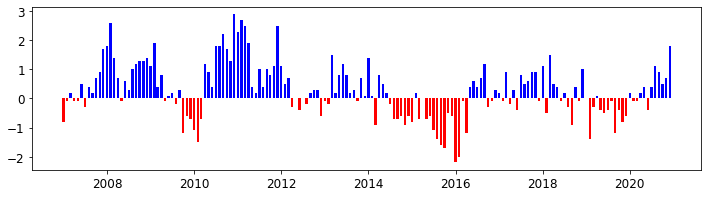

In [42]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(date[SOI>0], SOI[SOI>0], width=20, color='b')
ax.bar(date[SOI<0], SOI[SOI<0], width=20, color='r')


<BarContainer object of 82 artists>

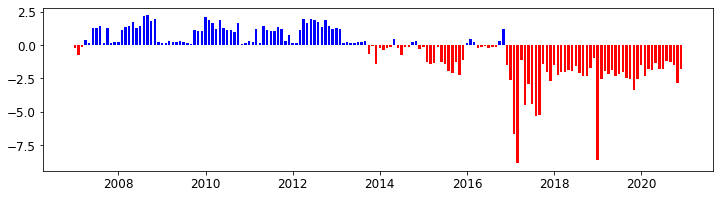

In [43]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(date[NPGO>0], NPGO[NPGO>0], width=20, color='b')
ax.bar(date[NPGO<0], NPGO[NPGO<0], width=20, color='r')



In [44]:
Diatoms = monthly_array_diatoms_depthint_slicemean.flatten()

In [45]:
Flagellates = monthly_array_flag_depthint_slicemean.flatten()

In [46]:
Diatoms.shape

(168,)

In [47]:
Flagellates.shape

(168,)

In [48]:
#Diatoms

(-10.0, 10.0)

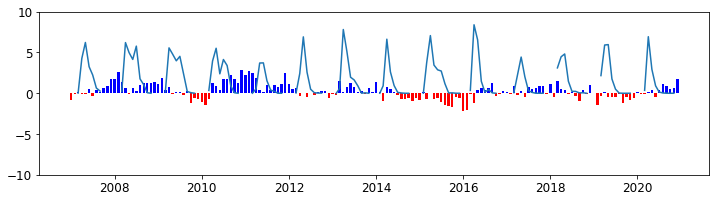

In [49]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(date[SOI>0], SOI[SOI>0], width=20, color='b')
ax.bar(date[SOI<0], SOI[SOI<0], width=20, color='r')
ax.plot(date,Diatoms*86400)
ax.set_ylim(-10,10)

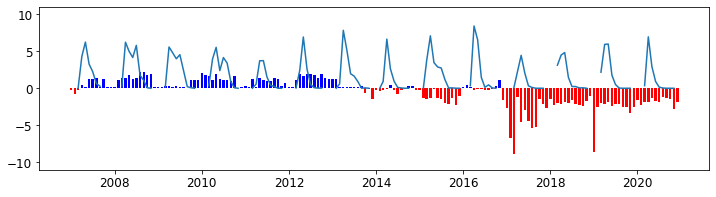

In [50]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(date[NPGO>0], NPGO[NPGO>0], width=20, color='b')
ax.bar(date[NPGO<0], NPGO[NPGO<0], width=20, color='r')
ax.set_ylim(-11,11)
ax.plot(date,Diatoms*86400)
#ax.plot(date,Flagellates*86400, color='k')

#fig, ax = plt.subplots(figsize=(12, 3))
#ax.set_ylim(0,10)
#ax.plot(date,Diatoms*86400)

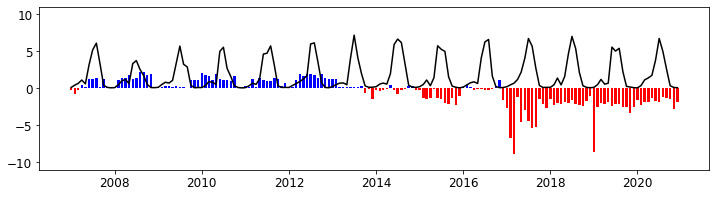

In [51]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.bar(date[NPGO>0], NPGO[NPGO>0], width=20, color='b')
ax.bar(date[NPGO<0], NPGO[NPGO<0], width=20, color='r')
ax.set_ylim(-11,11)
#ax.plot(date,Diatoms*86400)
ax.plot(date,Flagellates*86400, color='k')

Text(0, 0.5, 'μM N d$^{-1}$')

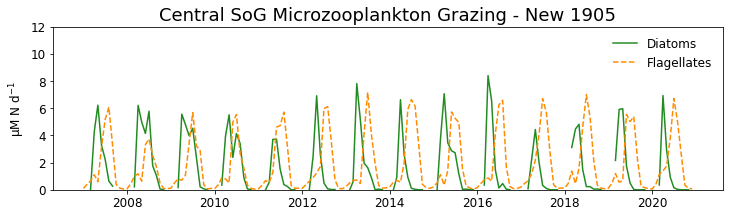

In [52]:
fig, ax = plt.subplots(figsize=(12, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

ax.plot(date,Diatoms*86400,color='forestgreen',label='Diatoms')
ax.plot(date,Flagellates*86400, color='darkorange',linestyle='--',label='Flagellates')
ax.set_title('Central SoG Microzooplankton Grazing - New 1905',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,12)
ax.set_ylabel('\u03bcM N d$^{-1}$')

In [53]:
Flagellates

array([1.20448220e-06, 4.88831689e-06, 7.50140346e-06, 1.28176959e-05,
       6.86412153e-06, 3.69447664e-05, 5.99495429e-05, 7.04457453e-05,
       3.77259787e-05, 4.54633183e-06, 1.34929230e-06, 6.83829892e-07,
       9.95990636e-07, 5.26238577e-06, 1.15415009e-05, 1.36468588e-05,
       7.35711646e-06, 3.84709260e-05, 4.32282580e-05, 2.93758736e-05,
       1.95358283e-05, 5.79262396e-06, 1.08699364e-06, 9.61311685e-07,
       1.47323868e-06, 6.02268454e-06, 9.39882073e-06, 8.09065773e-06,
       1.23928291e-05, 3.93599926e-05, 6.58215373e-05, 3.74874773e-05,
       3.32908510e-05, 4.50153298e-06, 7.66230673e-07, 1.17956810e-06,
       1.10772148e-06, 4.31615667e-06, 1.02719700e-05, 9.28878995e-06,
       5.94193343e-06, 5.75481498e-05, 6.40646345e-05, 3.09080965e-05,
       1.83696748e-05, 3.89516687e-06, 1.17135148e-06, 5.75026328e-07,
       9.28127022e-07, 3.90473675e-06, 7.86633139e-06, 6.10598009e-06,
       1.48714865e-05, 5.34231407e-05, 5.45716348e-05, 6.61468412e-05,
      